<a href="https://colab.research.google.com/github/MenakoD/TestStat_Python/blob/main/MasterClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Package pour l'importation des données
import pandas as pd


In [11]:
# Importer la base de données
df = pd.read_csv("/content/sample_data/Base_Churn.csv", sep=";", decimal=",")
df.head()

,ID,Call__Failure,Plaintes,Subscription__Length,Charge__Amount,Secondes_Utilisation,Frequence_Utilisation,Frequence_SMS,Numeros_Appeles_Distincts,Groupe_Age,Plan_Tarifaire,Statut,Age,Valeur_Client,Churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,2,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [12]:
# Analyser ds 1eres lignes de la base
df.head()

,ID,Call__Failure,Plaintes,Subscription__Length,Charge__Amount,Secondes_Utilisation,Frequence_Utilisation,Frequence_SMS,Numeros_Appeles_Distincts,Groupe_Age,Plan_Tarifaire,Statut,Age,Valeur_Client,Churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,2,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [13]:
# Types de données
# Valeur_client était Object, changé en Float en ajoutant decimal="," à l'importation de la base des données
df.dtypes

ID                             int64
Call__Failure                  int64
Plaintes                       int64
Subscription__Length           int64
Charge__Amount                 int64
Secondes_Utilisation           int64
Frequence_Utilisation          int64
Frequence_SMS                  int64
Numeros_Appeles_Distincts      int64
Groupe_Age                     int64
Plan_Tarifaire                 int64
Statut                         int64
Age                            int64
Valeur_Client                float64
Churn                          int64
dtype: object

In [15]:
# Transformer les données churn (variable qui dit si le client va partir à la concurrence)
# Transformer les var quali (plaintes, Groupe d'age, statut, Plan tarifaire) de int en chaine de caract (Object)avec
# la fonction astype de python
df['Churn'] = df['Churn'].astype("object")
df.dtypes

ID                             int64
Call__Failure                  int64
Plaintes                       int64
Subscription__Length           int64
Charge__Amount                 int64
Secondes_Utilisation           int64
Frequence_Utilisation          int64
Frequence_SMS                  int64
Numeros_Appeles_Distincts      int64
Groupe_Age                     int64
Plan_Tarifaire                 int64
Statut                         int64
Age                            int64
Valeur_Client                float64
Churn                         object
dtype: object

In [17]:
# Transformer tranche d'age
df['Groupe_Age'] = df['Groupe_Age'].astype("object")

# Transformer plainte
df['Plaintes'] = df['Plaintes'].astype("object")

# Transformer Statut
df['Statut'] = df['Statut'].astype("object")

# Transformer Plan_Tarifaire
df['Plan_Tarifaire'] = df['Plan_Tarifaire'].astype("object")

df.dtypes

ID                             int64
Call__Failure                  int64
Plaintes                      object
Subscription__Length           int64
Charge__Amount                 int64
Secondes_Utilisation           int64
Frequence_Utilisation          int64
Frequence_SMS                  int64
Numeros_Appeles_Distincts      int64
Groupe_Age                    object
Plan_Tarifaire                object
Statut                        object
Age                            int64
Valeur_Client                float64
Churn                         object
dtype: object


**Y** a t-il un lien entre la frequence des SMS des clients et la valeur des clients (chiffre affaire)?**texte en gras**
---



Text(0, 0.5, 'Valeur Client')

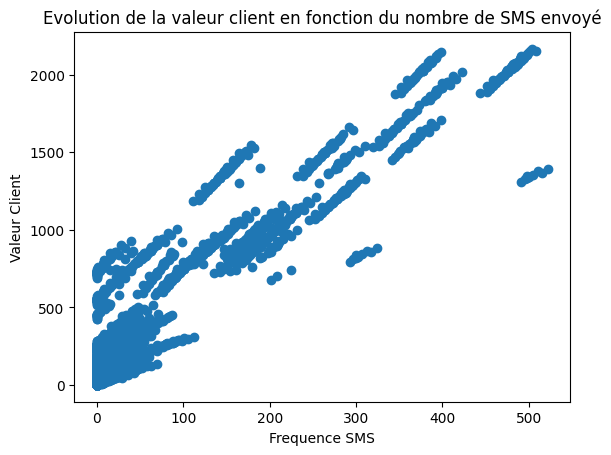

In [20]:
# Etape 1: Nuage de points (Scatterplot) entre les 2 variables

# Graphiqe avec Matplotlib (y a scatterplot dans Matplotlib)
import matplotlib.pyplot as plt
plt.scatter(df['Frequence_SMS'], df['Valeur_Client'])

# Personaliser le graphique après execution de plt.scatter
plt.title("Evolution de la valeur client en fonction du nombre de SMS envoyé")
plt.xlabel("Frequence SMS")
plt.ylabel("Valeur Client")


<Axes: xlabel='Frequence_SMS', ylabel='Valeur_Client'>

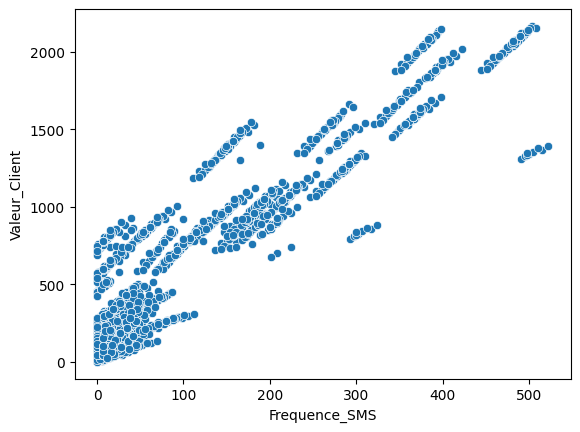

In [21]:
# Le même Graphique ci-dessus mais avec Seaborn
import seaborn as sns
sns.scatterplot(data= df, x= "Frequence_SMS", y = "Valeur_Client")

In [25]:
# Calcul des correlations
#Correlation de Pearson
pearson_corr = df["Valeur_Client"].corr(df["Frequence_SMS"], method='pearson')
pearson_corr

0.9248774260038422

In [26]:
# Correlation de Spearman
spearman_corr = df["Valeur_Client"].corr(df["Frequence_SMS"], method='spearman')
spearman_corr

0.7795895767906671

In [29]:
# Taux de Kendal
kendal_corr = df["Valeur_Client"].corr(df["Frequence_SMS"], method='kendall')
kendal_corr

0.6249297424932203

In [ ]:
# en vue des résltats ci-dessus il y a ne correlation forte entre les 2 var quanti
# Mais ce sont des résultats statistiques. Il faut à présent des résultats de test de Pearson, Spearman

In [31]:
# obtenir les probalités
# pour faire les test de pearson, spearman on a besoin du package scipyde python
# test de pearson
from scipy import stats
p = stats.pearsonr(df["Valeur_Client"], df["Frequence_SMS"])
p

PearsonRResult(statistic=0.9248774260038425, pvalue=0.0)

In [33]:
# test de spearman
from scipy import stats
p = stats.spearmanr(df["Valeur_Client"], df["Frequence_SMS"])
p

SignificanceResult(statistic=0.7795895767906671, pvalue=0.0)

In [38]:
# test de kendall
from scipy import stats
p = stats.kendalltau(df["Valeur_Client"], df["Frequence_SMS"])
p

SignificanceResult(statistic=0.6249297424932203, pvalue=0.0)

In [ ]:
# Notez que quand la p valeur faible on ne peut pas accepter l'hypothèse null qui stipule ds ce cas qu'il pas de correlation

In [ ]:
# Matrice de correlation (permet de calculer les valeurs2 à 2 poou toutes les var quanti)
